In [1]:
import os
import re
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm  # For color mapping
import numpy as np

In [2]:
# Function to extract metrics from the last line of the train.txt file
def extract_metrics(file_path):
    with open(file_path, 'r') as file:
        last_line = file.readlines()[-1].strip()
    
    # Use regex to extract PSNR and MS-SSIM values
    psnr_match = re.search(r'PSNR:([0-9]+\.[0-9]+)', last_line)
    msssim_match = re.search(r'MS-SSIM:([0-9]+\.[0-9]+)', last_line)
    
    psnr = float(psnr_match.group(1)) if psnr_match else None
    msssim = float(msssim_match.group(1)) if msssim_match else None
    return psnr, msssim

In [3]:
def gather_data(base_path):
    target_gaussian_numbers = {10000, 20000, 30000, 40000, 50000}
    target_Iteration_numbers = {10000, 20000, 30000, 40000, 50000}
    gaussian_numbers = []
    Iteration_numbers=[]
    psnr_values = []
    msssim_values = []
    
    # Iterate through each folder in the base path
    for folder_name in os.listdir(base_path):
        folder_path = os.path.join(base_path, folder_name)
        if os.path.isdir(folder_path):
            try:
                # Extract the Gaussian number from the folder name
                gaussian_number = int(folder_name.split('_')[-1])
                Iteration_numebr = int(folder_name.split('_')[-2])
                # Only process if the Gaussian number is in the target list
                if (gaussian_number in target_gaussian_numbers) and (Iteration_numebr in target_Iteration_numbers):
                    train_file = os.path.join(folder_path, 'train.txt')

                    if os.path.exists(train_file):
                        psnr, msssim = extract_metrics(train_file)
                        gaussian_numbers.append(gaussian_number)
                        Iteration_numbers.append(Iteration_numebr)
                        psnr_values.append(psnr)
                        msssim_values.append(msssim)
            except Exception as e:
                print(f"Error processing folder {folder_name}: {e}")

    return Iteration_numbers,gaussian_numbers, psnr_values, msssim_values

In [4]:
def plot_all_data(all_data_density, all_data_I, save_directory):
    for video_folder, data_density in all_data_density.items():
        # 获取density control的方法数据
        iteration_numbers_density = data_density['Iteration_numbers']
        gaussian_numbers_density = data_density['gaussian_numbers']
        psnr_values_density = data_density['psnr_values']
        msssim_values_density = data_density['msssim_values']

        # 获取baseline的数据
        data_I = all_data_I[video_folder]
        iteration_numbers_I = data_I['Iteration_numbers']
        gaussian_numbers_I = data_I['gaussian_numbers']
        psnr_values_I = data_I['psnr_values']
        msssim_values_I = data_I['msssim_values']
        
        fig = plt.figure(figsize=(20, 14))  # 增大图像尺寸以适应3D图
        # gaussian_numbers_density = [x * 2 for x in gaussian_numbers_density]
        # 获取唯一的Gaussian numbers和Iteration numbers
        unique_gaussian = sorted(set(gaussian_numbers_density))
        unique_iterations = sorted(set(iteration_numbers_density))
        unique_gaussian_I = sorted(set(gaussian_numbers_I))
        unique_iterations_I = sorted(set(iteration_numbers_I))
        
        # 设置间隔
        interval = 10000
        # Plot iteration number vs psnr_values
        # ax1 = fig.add_subplot(2, 3, 1)
        # for gaussian in unique_gaussian:
        #     idx_density = [i for i, g in enumerate(gaussian_numbers_density) if g == gaussian]
        #     idx_I = [i for i, g in enumerate(gaussian_numbers_I) if g == gaussian]
        #     ax1.plot([iteration_numbers_density[i] for i in idx_density], [psnr_values_density[i] for i in idx_density], 
        #              marker='o', linestyle='-', color='red', linewidth=2, label=f'Density Control - Gaussian {gaussian}')
        #     ax1.plot([iteration_numbers_I[i] for i in idx_I], [psnr_values_I[i] for i in idx_I], 
        #              marker='o', linestyle='--', color='blue', label=f'Baseline - Gaussian {gaussian}')
        # ax1.set_title(f'{video_folder}: Iteration Number vs PSNR')
        # ax1.set_xlabel('Iteration Number')
        # ax1.set_ylabel('PSNR')
        # ax1.legend(title="Method", loc='lower right')
        # ax1.grid(True)
        # ax1.set_xticks(range(interval, max(gaussian_numbers_density)+interval, interval))

        # # Plot iteration number vs msssim_values
        # ax2 = fig.add_subplot(2, 3, 2)
        # for gaussian in unique_gaussian:
        #     idx_density = [i for i, g in enumerate(gaussian_numbers_density) if g == gaussian]
        #     idx_I = [i for i, g in enumerate(gaussian_numbers_I) if g == gaussian]
        #     ax2.plot([iteration_numbers_density[i] for i in idx_density], [msssim_values_density[i] for i in idx_density], 
        #              marker='o', linestyle='-', color='red', linewidth=2, label=f'Density Control - Gaussian {gaussian}')
        #     ax2.plot([iteration_numbers_I[i] for i in idx_I], [msssim_values_I[i] for i in idx_I], 
        #              marker='o', linestyle='--', color='blue', label=f'Baseline - Gaussian {gaussian}')
        # ax2.set_title(f'{video_folder}: Iteration Number vs MSSSIM')
        # ax2.set_xlabel('Iteration Number')
        # ax2.set_ylabel('MSSSIM')
        # ax2.legend(title="Method", loc='lower right')
        # ax2.grid(True)
        # ax2.set_xticks(range(interval, max(gaussian_numbers_density)+interval, interval))

        # Plot gaussian number vs psnr_values
        ax1 = fig.add_subplot(1, 2, 1)
        for iteration in unique_iterations:
            idx_density = [i for i, it in enumerate(iteration_numbers_density) if it == iteration]
            ax1.plot([gaussian_numbers_density[i] for i in idx_density], [psnr_values_density[i] for i in idx_density], 
                     marker='o', linestyle='-', color='red', linewidth=2, label=f'Density Control - Iteration {iteration}')
        for iteration in unique_iterations_I:    
            idx_I = [i for i, it in enumerate(iteration_numbers_I) if it == iteration] 
            ax1.plot([gaussian_numbers_I[i] for i in idx_I], [psnr_values_I[i] for i in idx_I], 
                     marker='o', linestyle='--', label=f'Baseline - Iteration {iteration}')
        ax1.set_title(f'{video_folder}: Gaussian Number vs PSNR')
        ax1.set_xlabel('Gaussian Number')
        ax1.set_ylabel('PSNR')
        ax1.legend(title="Method", loc='lower right')
        ax1.grid(True)
        ax1.set_xticks(range(interval, max(gaussian_numbers_I)+interval, interval))

        # Plot gaussian number vs msssim_values
        ax2 = fig.add_subplot(1, 2, 2)
        for iteration in unique_iterations:
            idx_density = [i for i, it in enumerate(iteration_numbers_density) if it == iteration]
            ax2.plot([gaussian_numbers_density[i] for i in idx_density], [msssim_values_density[i] for i in idx_density], 
                     marker='o', linestyle='-', color='red', linewidth=2, label=f'Density Control - Iteration {iteration}')
        for iteration in unique_iterations_I:
            idx_I = [i for i, it in enumerate(iteration_numbers_I) if it == iteration]
            ax2.plot([gaussian_numbers_I[i] for i in idx_I], [msssim_values_I[i] for i in idx_I], 
                     marker='o', linestyle='--', label=f'Baseline - Iteration {iteration}')
        ax2.set_title(f'{video_folder}: Gaussian Number vs MSSSIM')
        ax2.set_xlabel('Gaussian Number')
        ax2.set_ylabel('MSSSIM')
        ax2.legend(title="Method", loc='lower right')
        ax2.grid(True)
        ax2.set_xticks(range(interval, max(gaussian_numbers_I)+interval, interval))
    
        plt.tight_layout()

        # Save the figure
        save_path = os.path.join(save_directory, f'{video_folder}_graphs.png')
        
        plt.savefig(save_path, format='png', dpi=300)
        plt.show()
        plt.close()

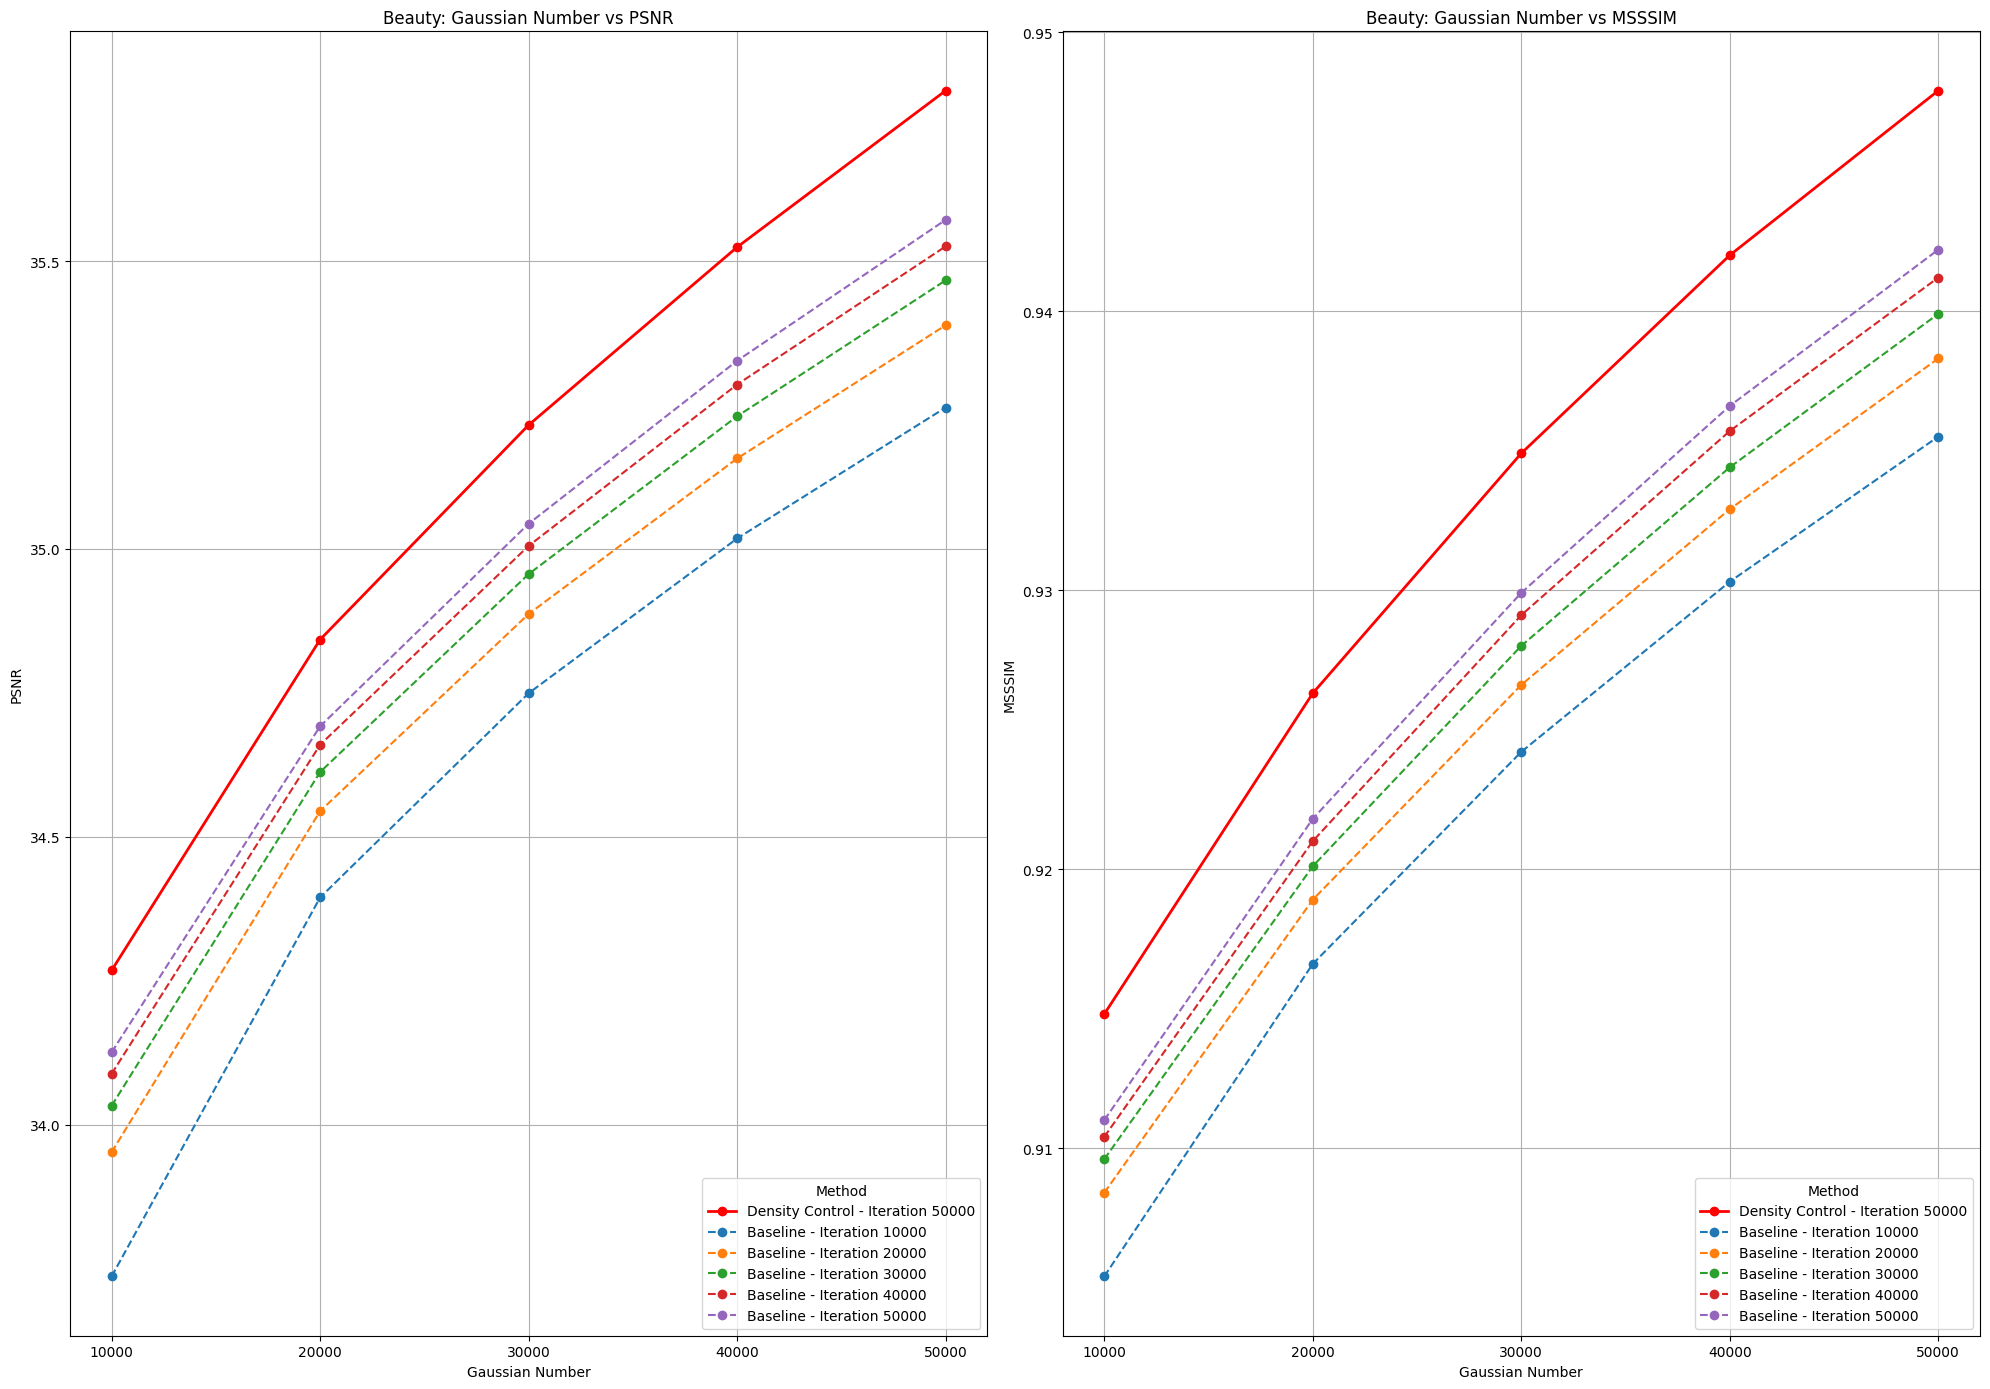

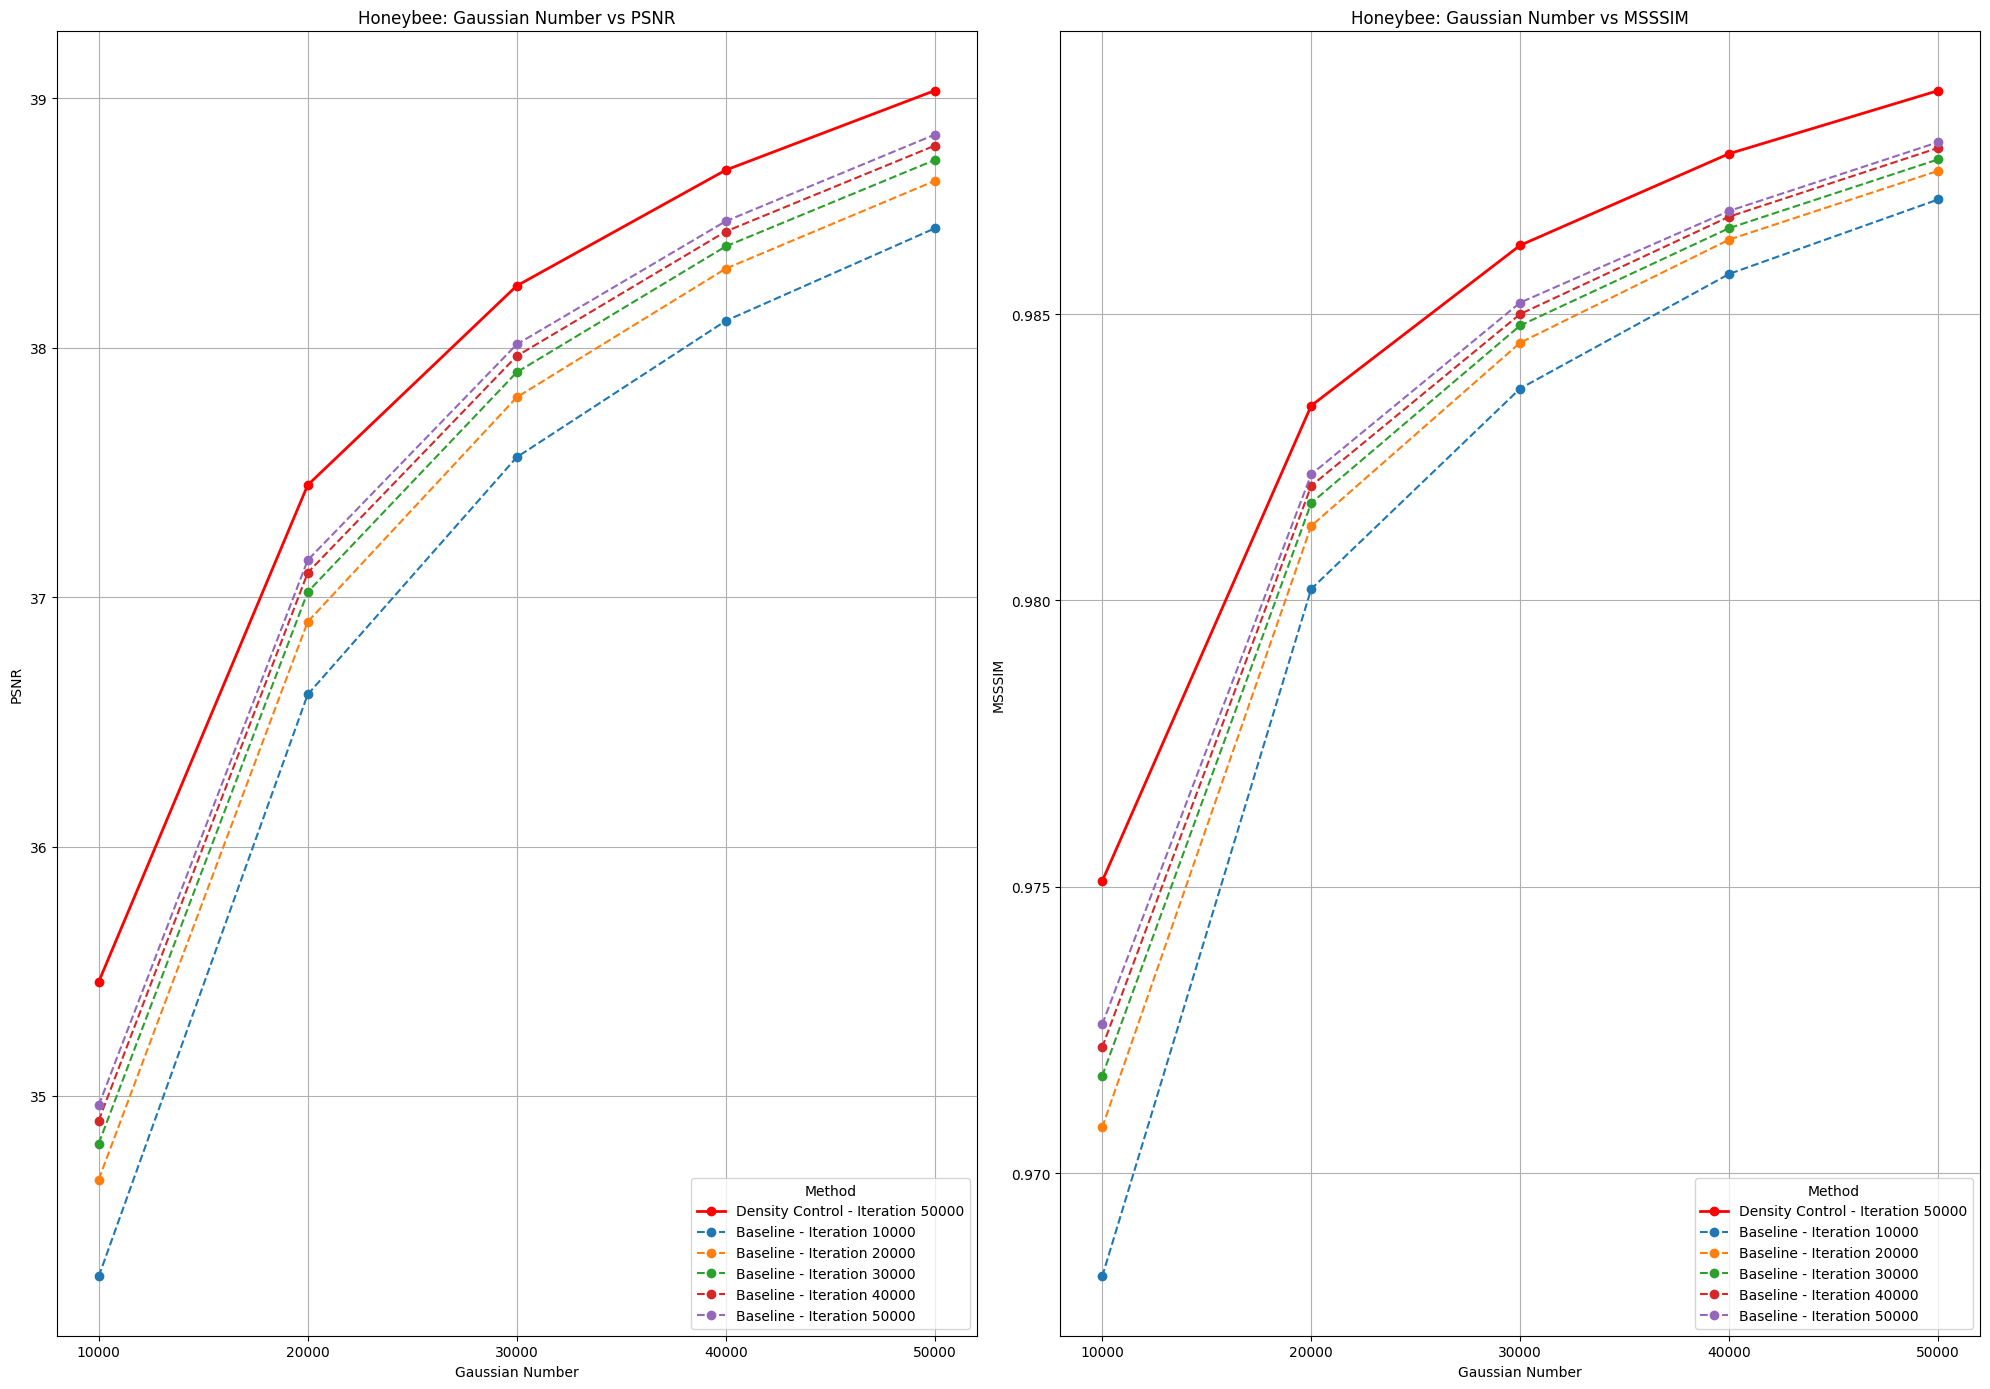

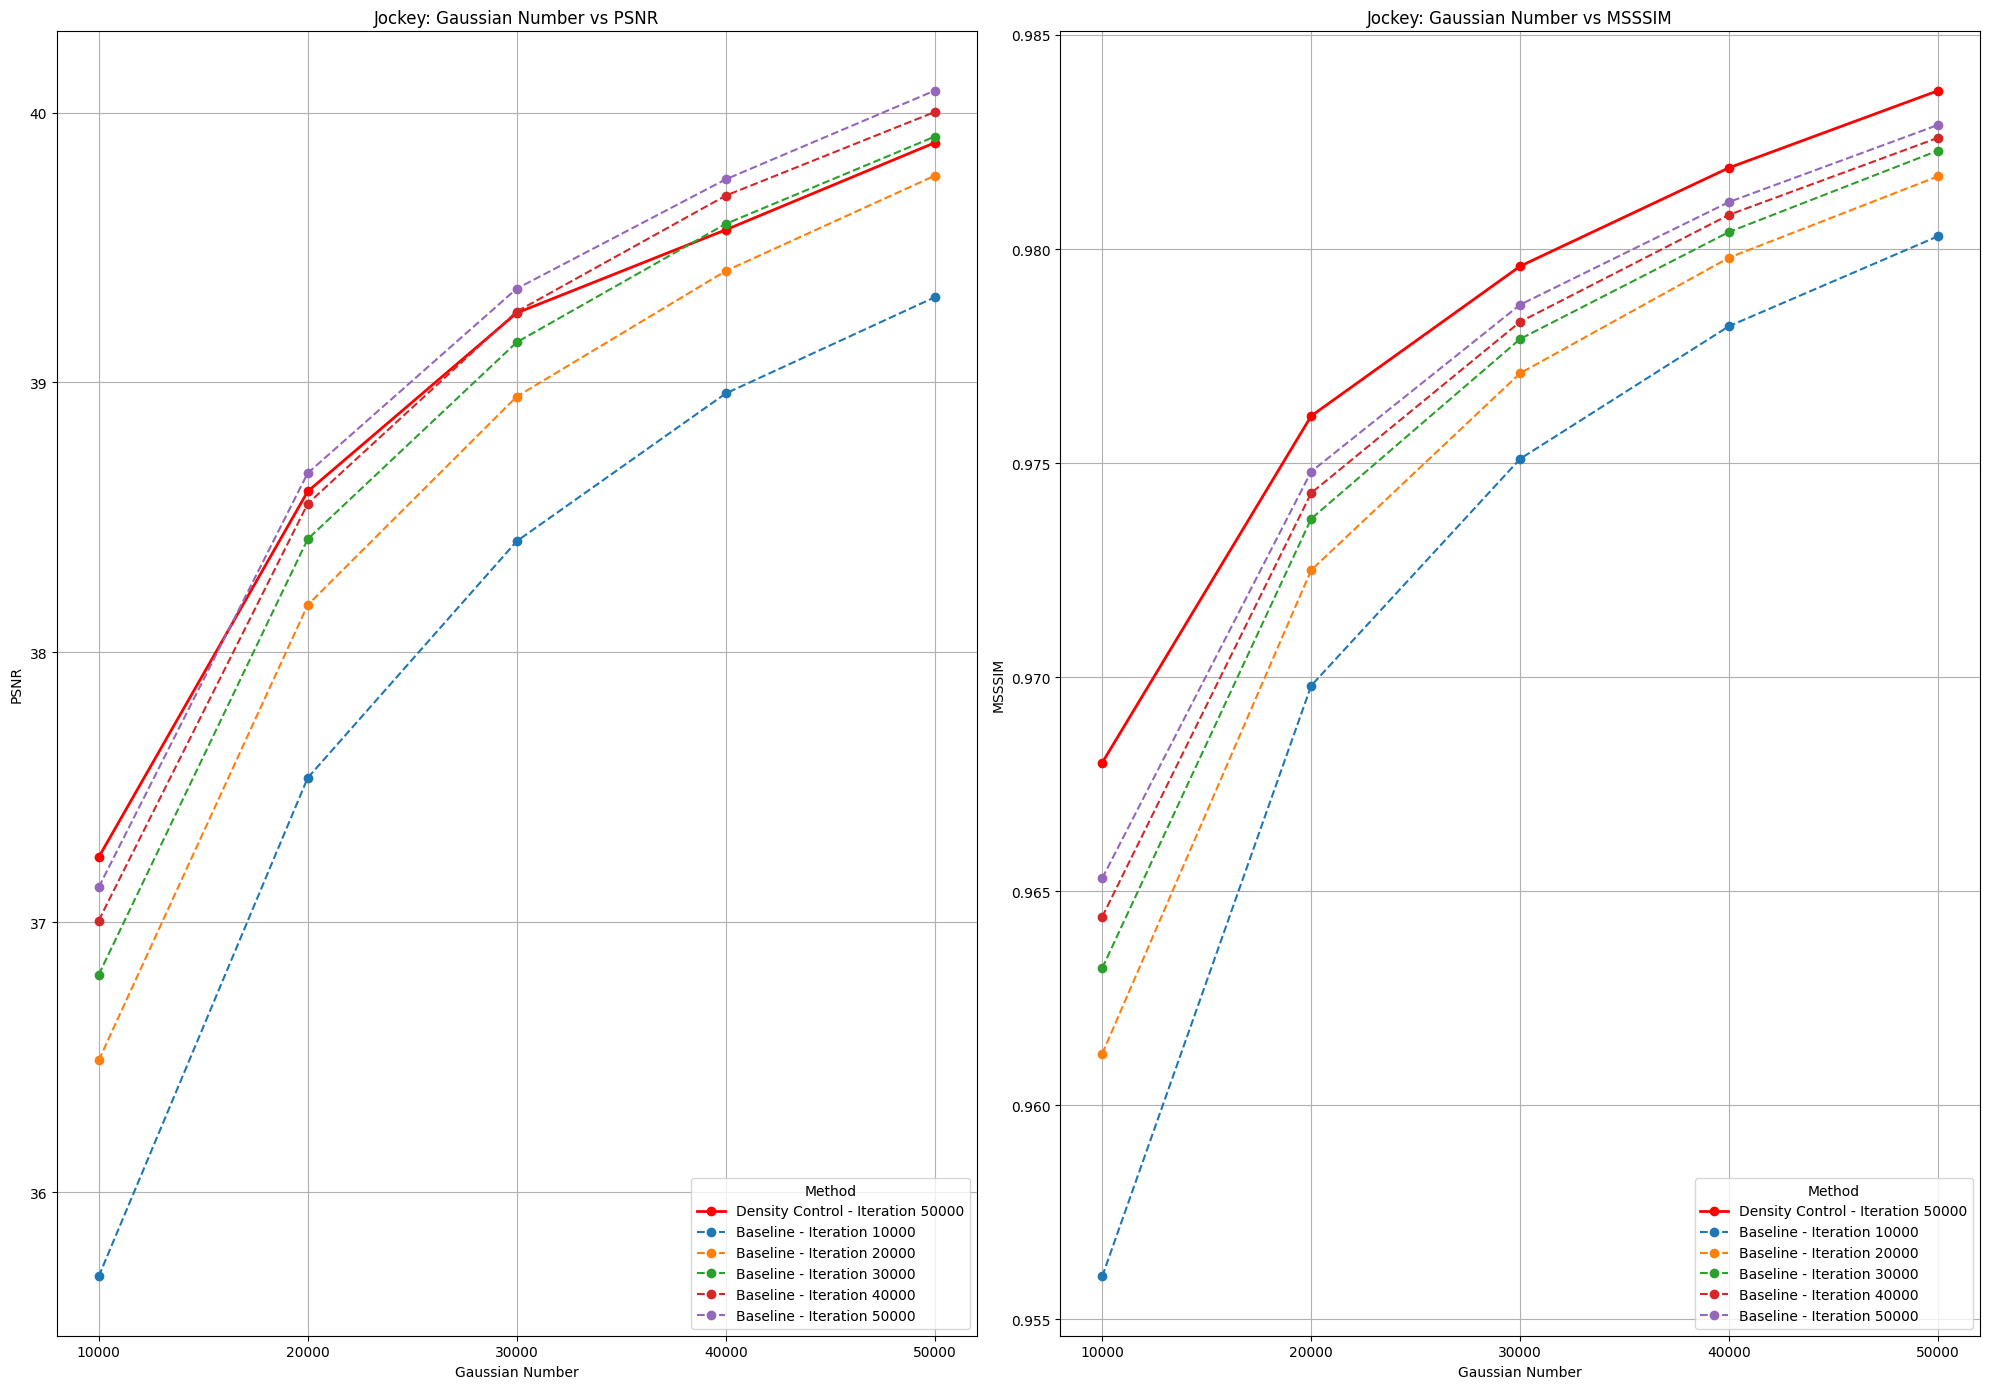

In [5]:
result_pos_density_folder = '../result_pos_density'  # Set this to the base folder path containing 'Beauty', 'Honeybee', 'Jockey'
#save_directory = './img_pos_density'  # Set the directory where you want to save the plots
result_I = '../result_I'  # Set this to the base folder path containing 'Beauty', 'Honeybee', 'Jockey'
save_directory = './img_comp'  # Set the directory where you want to save the plots
# Create the save directory if it doesn't exist
os.makedirs(save_directory, exist_ok=True)

all_data_density = {}
all_data_I = {}

for video_folder in ['Beauty', 'Honeybee', 'Jockey']:
    video_path = os.path.join(result_pos_density_folder,video_folder)
    iteration_numbers, gaussian_numbers, psnr_values, msssim_values = gather_data(video_path)

    all_data_density[video_folder] = {
        'Iteration_numbers': iteration_numbers,
        'gaussian_numbers': gaussian_numbers,
        'psnr_values': psnr_values,
        'msssim_values': msssim_values,
    }

for video_folder in ['Beauty', 'Honeybee', 'Jockey']:
    video_path = os.path.join(result_I,video_folder)
    iteration_numbers, gaussian_numbers, psnr_values, msssim_values = gather_data(video_path)

    all_data_I[video_folder] = {
        'Iteration_numbers': iteration_numbers,
        'gaussian_numbers': gaussian_numbers,
        'psnr_values': psnr_values,
        'msssim_values': msssim_values,
    }

# Plot and save all data
plot_all_data(all_data_density,all_data_I, save_directory)